<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/Unsupervise_PCA_hierarchicalclustering_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [ ]:
amazon = pd.read_csv('/content/Amazon Echo 2 Reviews.csv')

In [ ]:
amazon

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Three Stars,Not great speakers,Black,Verified Purchase,10/3/2017,NaN,Echo Dot,3,NaN
1,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Four Stars,Great little gagit,White,Verified Purchase,9/26/2017,NaN,Echo Dot,4,NaN
2,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Awesome!,Awesome 👏🏽,White,Verified Purchase,9/8/2017,NaN,Echo Dot,5,NaN
3,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Love my Echo,Black,Verified Purchase,10/19/2017,NaN,Echo Dot,5,NaN
4,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,Great device,Black,Verified Purchase,9/17/2017,NaN,Echo Dot,5,NaN
...,...,...,...,...,...,...,...,...,...,...
6850,https://www.amazon.com/All-New-Amazon-Echo-Dot...,In love with Alexa!!,This is so much fun! I love her.,Black,Verified Purchase,9/17/2017,NaN,Echo Dot,5,NaN
6851,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Five Stars,I'm having a lot of fun with it.,White,Verified Purchase,9/16/2017,NaN,Echo Dot,5,NaN
6852,https://www.amazon.com/All-New-Amazon-Echo-Dot...,We would still like to exchange for something ...,I bought this as a gift for my husband and he ...,Black,Verified Purchase,9/26/2017,NaN,Echo Dot,3,NaN
6853,https://www.amazon.com/All-New-Amazon-Echo-Dot...,Simply fabulous!,I have now set Alexa up to control lights in m...,Black,Verified Purchase,9/27/2017,NaN,Echo Dot,5,NaN


In [ ]:
amazon.isnull().sum()

,0
Pageurl,0
Title,0
Review Text,5
Review Color,0
User Verified,214
Review Date,0
Review Useful Count,6827
Configuration Text,0
Rating,0
Declaration Text,6849


In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pageurl              6855 non-null   object 
 1   Title                6855 non-null   object 
 2   Review Text          6850 non-null   object 
 3   Review Color         6855 non-null   object 
 4   User Verified        6641 non-null   object 
 5   Review Date          6855 non-null   object 
 6   Review Useful Count  28 non-null     float64
 7   Configuration Text   6855 non-null   object 
 8   Rating               6855 non-null   int64  
 9   Declaration Text     6 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 535.7+ KB


In [ ]:
amazon['Review Text']=amazon['Review Text'].fillna('unknown')

In [ ]:
amazon['User Verified'] = amazon['User Verified'].fillna('unknown')

In [ ]:
amazon['Review Useful Count']=amazon['Review Useful Count'].fillna(amazon['Review Useful Count'].mean())

In [ ]:
amazon['Declaration Text']=amazon['Declaration Text'].fillna('unknown')

In [ ]:
amazon.isnull().sum()

,0
Pageurl,0
Title,0
Review Text,0
Review Color,0
User Verified,0
Review Date,0
Review Useful Count,0
Configuration Text,0
Rating,0
Declaration Text,0


In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in amazon.select_dtypes(include='object').columns:
  amazon[i] = le.fit_transform(amazon[i])

In [ ]:
amazon

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,2612,2783,3714,0,0,19,17.071429,0,3,4
1,2612,880,1213,1,0,44,17.071429,0,4,4
2,2788,408,371,1,0,54,17.071429,0,5,4
3,2788,870,3239,0,0,10,17.071429,0,5,4
4,2788,870,1130,0,0,34,17.071429,0,5,4
...,...,...,...,...,...,...,...,...,...,...
6850,1287,1638,4617,0,0,34,17.071429,0,5,4
6851,1287,870,2410,1,0,33,17.071429,0,5,4
6852,2521,2940,1567,0,0,44,17.071429,0,3,4
6853,2202,2511,1776,0,0,45,17.071429,0,5,4


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in amazon.columns:
  amazon[i] = sc.fit_transform(amazon[[i]])

In [ ]:
amazon

,Pageurl,Title,Review Text,Review Color,User Verified,Review Date,Review Useful Count,Configuration Text,Rating,Declaration Text
0,0.709048,1.476291,0.480230,-0.516815,-0.179511,-0.989388,-9.715494e-16,-0.012079,-0.948560,0.027441
1,0.709048,-0.658967,-1.010531,1.934928,-0.179511,0.704922,-9.715494e-16,-0.012079,-0.162679,0.027441
2,0.876118,-1.188574,-1.512419,1.934928,-0.179511,1.382646,-9.715494e-16,-0.012079,0.623202,0.027441
3,0.876118,-0.670188,0.197099,-0.516815,-0.179511,-1.599339,-9.715494e-16,-0.012079,0.623202,0.027441
4,0.876118,-0.670188,-1.060005,-0.516815,-0.179511,0.027198,-9.715494e-16,-0.012079,0.623202,0.027441
...,...,...,...,...,...,...,...,...,...,...
6850,-0.548727,0.191546,1.018478,-0.516815,-0.179511,0.027198,-9.715494e-16,-0.012079,0.623202,0.027441
6851,-0.548727,-0.670188,-0.297040,1.934928,-0.179511,-0.040574,-9.715494e-16,-0.012079,0.623202,0.027441
6852,0.622665,1.652453,-0.799524,-0.516815,-0.179511,0.704922,-9.715494e-16,-0.012079,-0.948560,0.027441
6853,0.319849,1.171094,-0.674946,-0.516815,-0.179511,0.772694,-9.715494e-16,-0.012079,0.623202,0.027441


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(amazon)
x_pca
z = linkage(x_pca,method = 'ward')


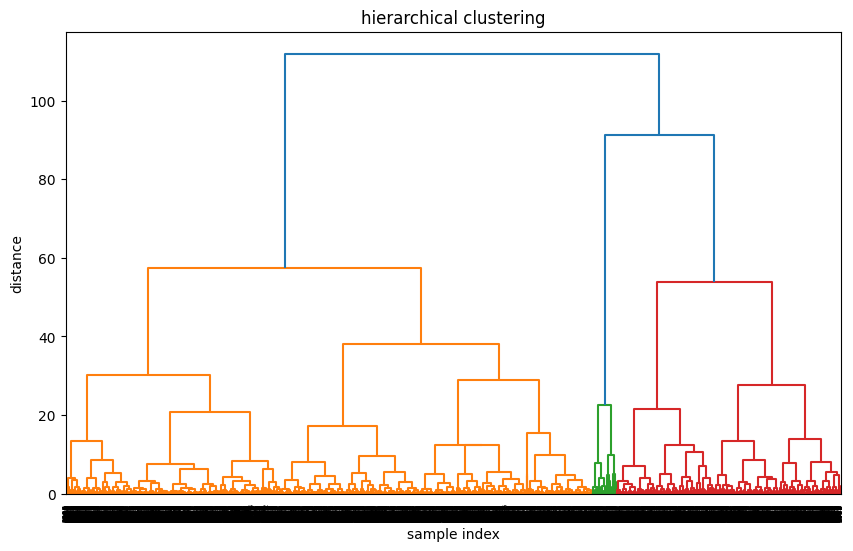

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(z)
plt.title('hierarchical clustering')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

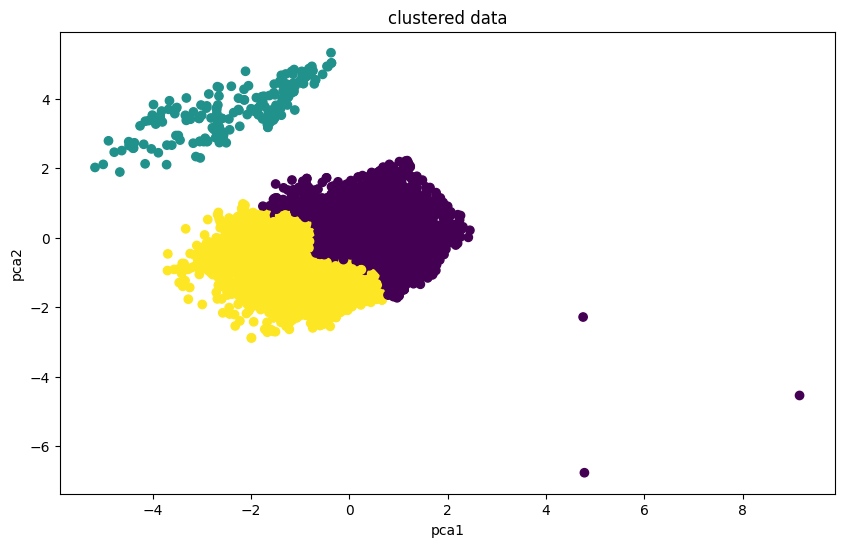

In [ ]:
clusters = fcluster(z,t=3,criterion='maxclust')
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=clusters)
plt.title('clustered data')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()